<a href="https://colab.research.google.com/github/toitoi11/Season-Prediction/blob/main/season_prediction_clustering_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Extract data

In [33]:
df = pd.read_csv('/content/drive/MyDrive/project/clustering/seoul_weather_data_4yrs.csv')

data = df[['avg_temp', 'rainfall', 'humidity']]

# Apply custom weights to the features
df['weighted_avg_temp'] = df['avg_temp'] * 10
df['weighted_rainfall'] = df['rainfall']
df['weighted_humidity'] = df['humidity'] *  2

weighted_data = df[['weighted_avg_temp', 'weighted_rainfall', 'weighted_humidity']]

scaler = StandardScaler()
scaled_weighted_data = scaler.fit_transform(weighted_data)


Apply K-Means Clustering

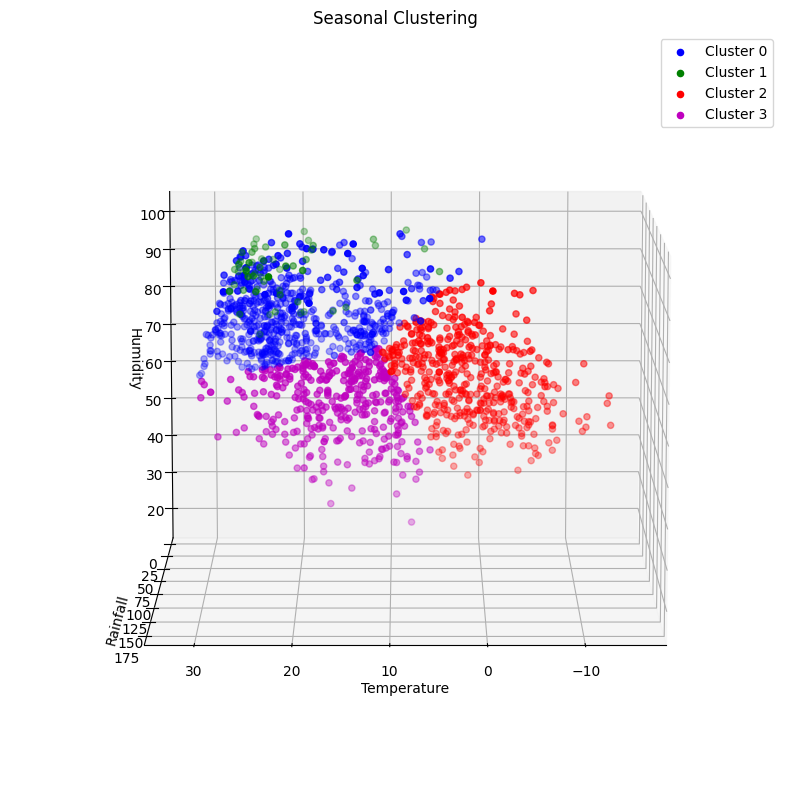

In [34]:
# Apply K-Means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=1000)
df['cluster'] = kmeans.fit_predict(scaled_weighted_data)

# Create 3D scatter plot using avg_temp, rainfall, and humidity
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['b', 'g', 'r', 'm']

# Scatter plot with cluster-specific colors
for cluster_num in range(4):
    cluster_data = df[df['cluster'] == cluster_num]
    ax.scatter(
        cluster_data['avg_temp'],
        cluster_data['rainfall'],
        cluster_data['humidity'],
        color=colors[cluster_num],
        label=f'Cluster {cluster_num}'
    )

# Label axes
ax.set_xlabel('Temperature')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Humidity')

# Set the plot title
ax.set_title('Seasonal Clustering')

# Add a legend for clusters
ax.legend(loc='upper right')

ax.view_init(elev=10, azim=90)

# Show the plot
plt.show()

Predict using the model

In [40]:
# Labeling each cluster
cluster_to_season = {
    0: 'Spring',
    1: 'Summer',
    2: 'Winter',
    3: 'Fall'
}

# Sample data to predict the season
new_data = {'avg_temp': 26, 'rainfall': 60, 'humidity': 70}

# Apply the same weighting as done during training
new_data_weighted = {
    'weighted_avg_temp': new_data['avg_temp'] * 10,
    'weighted_rainfall': new_data['rainfall'],
    'weighted_humidity': new_data['humidity'] * 2
}


new_data_df = pd.DataFrame([new_data_weighted])

scaled_new_data = scaler.transform(new_data_df)

# Predict the cluster for the new data
predicted_cluster = kmeans.predict(scaled_new_data)[0]
predicted_season = cluster_to_season[predicted_cluster]

# Output the predicted season
print(f"The predicted season for the given data is: {predicted_season}")

The predicted season for the given data is: Summer
